In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.layers import LSTM, Dense

Import Stock Data from yfinance. More about it in a few classes.

In [ ]:
# Define the ticker symbol and time period
ticker = 'TATAMOTORS.NS'
start_date = '2010-01-01'
end_date = '2022-12-31'

# Download the data
data = yf.download(ticker, start=start_date, end=end_date)


[*********************100%***********************]  1 of 1 completed


In [ ]:
# Select the 'Close' price column
df = data[['Close']]

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df.values)

# Split the data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Create sequences of historical data
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 30  # Number of previous days to consider
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

In [ ]:
print(X_train.shape)

(2537, 30, 1)


##RNN

In [ ]:
rnn_model = Sequential()
rnn_model.add(SimpleRNN(50, activation='relu', input_shape=(seq_length, 1)))
rnn_model.add(Dense(1))
rnn_model.compile(optimizer='adam', loss='mean_squared_error')
rnn_model.fit(X_train, y_train, epochs=50, batch_size=32)


# rnn_model = Sequential()
# rnn_model.add(Embedding(10000, 64, input_length=max_len))
# rnn_model.add(SimpleRNN(64))
# rnn_model.add(Dense(2, activation='sigmoid'))
# rnn_model.summary()


Epoch 1/50
80/80 [==============================] - 9s 29ms/step - loss: 0.0329
Epoch 2/50
80/80 [==============================] - 2s 22ms/step - loss: 5.4540e-04
Epoch 3/50
80/80 [==============================] - 1s 18ms/step - loss: 5.1136e-04
Epoch 4/50
80/80 [==============================] - 1s 19ms/step - loss: 4.8518e-04
Epoch 5/50
80/80 [==============================] - 2s 19ms/step - loss: 4.7236e-04
Epoch 6/50
80/80 [==============================] - 2s 19ms/step - loss: 4.3639e-04
Epoch 7/50
80/80 [==============================] - 1s 19ms/step - loss: 4.1617e-04
Epoch 8/50
80/80 [==============================] - 2s 22ms/step - loss: 4.1567e-04
Epoch 9/50
80/80 [==============================] - 2s 29ms/step - loss: 4.0027e-04
Epoch 10/50
80/80 [==============================] - 1s 18ms/step - loss: 3.6529e-04
Epoch 11/50
80/80 [==============================] - 2s 19ms/step - loss: 3.3255e-04
Epoch 12/50
80/80 [==============================] - 1s 19ms/step - loss: 3.18

In [ ]:
rnn_predictions = rnn_model.predict(X_test)
rnn_predictions = scaler.inverse_transform(rnn_predictions)

20/20 [==============================] - 0s 4ms/step


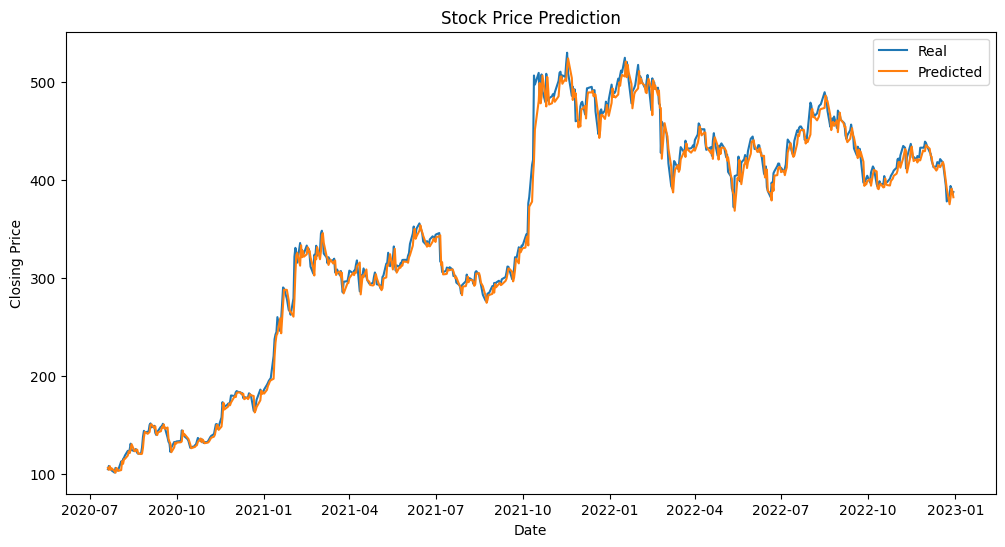

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df.index[train_size + seq_length:], df['Close'][train_size + seq_length:], label='Real')
plt.plot(df.index[train_size + seq_length:], rnn_predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Stock Price Prediction')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

rnn_predictions = rnn_predictions.reshape(-1)
y_test = y_test.reshape(-1)

rnn_predictions = scaler.inverse_transform([rnn_predictions])
y_test = scaler.inverse_transform([y_test])

rmse = np.sqrt(mean_squared_error(y_test[0], rnn_predictions[0]))

print("Root Mean Squared Error for the RNN Model:", rmse)


Root Mean Squared Error for the RNN Model: 193015.87281723294


##LSTM

In [ ]:
lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_train, y_train, epochs=50, batch_size=32)


Epoch 1/50
80/80 [==============================] - 6s 51ms/step - loss: 0.0331
Epoch 2/50
80/80 [==============================] - 3s 43ms/step - loss: 0.0013
Epoch 3/50
80/80 [==============================] - 3s 43ms/step - loss: 0.0010
Epoch 4/50
80/80 [==============================] - 5s 59ms/step - loss: 8.5437e-04
Epoch 5/50
80/80 [==============================] - 4s 44ms/step - loss: 7.5511e-04
Epoch 6/50
80/80 [==============================] - 4s 44ms/step - loss: 7.0031e-04
Epoch 7/50
80/80 [==============================] - 5s 59ms/step - loss: 6.1844e-04
Epoch 8/50
80/80 [==============================] - 4s 44ms/step - loss: 5.9427e-04
Epoch 9/50
80/80 [==============================] - 4s 55ms/step - loss: 6.0352e-04
Epoch 10/50
80/80 [==============================] - 5s 62ms/step - loss: 5.3575e-04
Epoch 11/50
80/80 [==============================] - 4s 46ms/step - loss: 4.7437e-04
Epoch 12/50
80/80 [==============================] - 4s 45ms/step - loss: 4.5146e-04
E

In [ ]:
lstm_predictions = lstm_model.predict(X_test)
lstm_predictions = scaler.inverse_transform(lstm_predictions)
lstm_predictions = lstm_predictions.reshape(-1,1)  # Reshape predictions

y_test = scaler.inverse_transform(y_test)
y_test = y_test.reshape(-1,1)  # Reshape ground truth

rmse = np.sqrt(mean_squared_error(y_test, lstm_predictions))
print("Root Mean Squared Error (RMSE):", rmse)


20/20 [==============================] - 0s 9ms/step
Root Mean Squared Error (RMSE): 194761.4644590387
